### 3 ニューラルネットワーク

### 3.1 パーセプトロンからニューラルネットワーク

### 3.1.1 ニューラルネットワークの例

ニューラルネットワークを図で表すと, 図3-1のようになります.  
ここで一番左の列を**入力層**, 一番右の列を**出力層**, 中間の列を**中間層**と呼びます.  
中間層は**隠れ層**と呼ぶこともあります
「隠れ」という言葉は, 隠れ層のニューロンが(入力層や出力層とは違って)人の目には見えない, ということを表しています.  
ここでは, 入力層から出力層へ向かって, 順に第0層, 第1層, 第2層と呼ぶことにします.  
図3-1では, 第0層が入力層, 第1層が中間層, 第2層が出力層に対応することになります.  

図3-1を見る限り,前章で見たパーセプトロンと同じような形をしています.  
実際, ニューロンの"つながり方"に関して言えば, 前章で見たパーセプトロンと何ら変わりません.  
それでは,ニューラルネットワークではどのように信号を伝達するのでしょうか.  

### 3.1.2 パーセプトロンの復習

これからニューラルネットワークにおける信号の伝達方法を見ていきますが, それに先立ち,ここではパーセプトロンの復習から始めたいとおもいます.  
それでは,初めに,図3-2の構造のネットワークを考えましょう.  

図3-2は$x_1$と$x_2$の2つの入力信号を受け取り, $y$を出力するパーセプトロンです.  
図3-2のパーセプトロンを数式で表すと, 次の式(3.1)で表せるのでした.  

$$
    \mathrm{y} =
        \begin{cases}
            0 \quad ( b + w_1x_1 + w_2x_2 \leqq 0 ) \\
            1 \quad ( b + w_1x_1 + w_2x_2 > 0 ) \\
        \end{cases}
    \tag{3.1}
$$

ここで,$b$は「バイアス」と呼ばれるパラメータで,これはニューロンの発火のしやすさをコントロールします.  
一方, $w_1$や$w_2$は各信号の「重み」を表すパラメータで, これらは各信号の重要性をコントロールします.  
ところで, 図3-2のネットワークにはバイアス$b$が図示されていません.  
もしバイアスを明示するならば, 図3-3のように表すことができます.  
図3-3では,重みが$b$で入力が1の信号が追加されています.  
このパーセプトロンの動作は, $x_1$と$x_2$と1の3つの諡号がニューロンの入力となり, それら3つの信号にそれぞれの重みが乗算され, 次のニューロンに送信されます.  
次のニューロンでは,それらの重み付けされた信号の和が計算され, その和が0を超えたら1を出力し, そうでなければ0を出力します.  
ちなみに,バイアスの入力信号は常に1であるため, 図で表す際には, ニューロンを灰色で塗りつぶし, 他のニューロンと差別化することにします.  

それでは,式(3.1)をよりシンプルな形に書き換えたいと思います.  
式(3.1)を簡略化するためには, 場合分けの動作---を超えたら1を出力し,そうでなければ0を出力するという動作---をひとつの関数で表します.  
ここでは$h(x)$という新しい関数を導入し, 式(3.1)を次の(3.2), (3.3)のように書き換えます.  

$$
    \mathrm{y} = h(b + w_1x_1 + w_2x_2)
    \tag{3.2}
$$

$$
    \mathrm{h(x)} =
        \begin{cases}
            0 \quad ( x \leqq 0 ) \\
            1 \quad ( x > 0 ) \\
        \end{cases}
    \tag{3.3}
$$

式(3.2)は,入力信号の総和が$h(x)$という関数によって変換され, その変換された値が出力$y$になるということをあらわしています.  
そして, 式(3.3)であらわされる$h(x)$関数は入力が0を超えたら1を返し, そうでなければ0を返します.  
そのため, 式(3.1)と式(3.2),(3.3)は同じことを行ってます.  

### 3.1.3 活性化関数の登場

ここで$h(x)$という関数ですが,このような関数---入力信号の総和を出力信号に変換する関数---は,一般に**活性化関数**(activation function)とよばれます.  
「活性化」という名前が意味するように, 活性化関数は入力信号の総和がどのように活性化するか(どのように発火するか)とうことを決定する役割があります.  
それではさらに式(3.2)を書き換えていきます.  
式(3.2)では,重み付きの入力信号の総和を計算し, そして, その和が活性化関数によって変換される, という2段階の処理を行っています.  
そのため, 式(3.2)を丁寧に書くとすれば, 次の2つの式に分けて書くことができます.  

$$
    \mathrm{a} = b + w_1x_1 + w_2x_2
    \tag{3.4}
$$

$$
    \mathrm{y} = h(a)
    \tag{3.5}
$$

式(3.4)では,重み付き入力信号とバイアスの総和を計算し, それを$a$とします.  
そして,式(3.5)において, $a$が$h()$で変換され, $y$が出力される, という流れになります.  
さて, これまでニューロンはひとつの○で図示してきましたが, 式(3.4)と式(3.5)を明示的に示すとすれば, 次の図3-4のように表すことができます.  

図3-4で表されるように, これまでのニューロンの○の中に,活性化関数によるプロセスを明示的に図示しています.  
つまり, 重み付き信号の和の結果が$a$というノードになり, そして, 活性化関数$h()$によって$y$というノードに変換される,ということがはっきりと示されているわけです.  
なを,ここでは,「ニューロン」と「ノード」という用語を同じ意味で用います.  
ここで, $a$と$y$の○を「ノード」と呼んでいますが, これは, これまでの「ニューロン」と同じ意味で用いています.  

それでは続いて活性化関数について詳しく見ていくことにします.  
この活性化関数が, パーセプトロンからニューラルネットワークへ進むための架け橋になります.  

### 3.2 活性化関数

式(3.3)で表される活性化関数は, 閾値を境にして出力が切り替わる関数で, それは「ステップ関数」や「階段関数」と呼ばれます.  
そのため, 「パーセプトロンでは, 活性化関数にステップ関数を利用している」ということができます.  
つまり, 活性化関数の候補としてたくさんある関数の中で, パーセプトロンは「ステップ関数」を採用しているのです.  
パーセプトロンは活性化関数にステップ関数を用いているならば, 活性化関数にステップ関数以外の関数を使ったらどうなるのか.  
実は活性化関数をステップ関数から別の関数に変更することで, ニューラルネットワークの世界へとすすむことができます.  
ニューラルネットワークで利用される活性化関数を紹介する.  

### 3.2.1 シグモイド関数

ニューラルネットワークでよく用いられるか成果関数のひとつは, 式(3.6)で表される**シグモイド関数**(sigmoid function)です.

$$
    \mathrm{h(x)} = \frac{ 1 }{ 1 + exp(-x) }
    \tag{3.6}
$$

式(3.6)の$exp(-x)$は$e^{-x}$を意味します.  
$e$はネイピア数の2.7182…の実数を表します.  
式(3.6)で表されるシグモイド関数は一見複雑そうですが、 シグモイド関数も単なる「関数」です --- 関数は,何か入力を与えれば, 何らかの出力が返される変換器です.  
たとえば, シグモイド関数に1.0や2.0を入力すると,$h(1.0) = 0.731…$, $h(2.0) = 0.880…$のように, ある値が出力されます.  
ニューラルネットワークでは, 活性化関数にシグモイド関数を用いて信号の変換を行い, その変換された信号が次のニューロンに伝えられます.  
実は, 前章で見たパーセプトロンとこれから見ていくニューラルネットワークの主な違いは, この活性化関数だけなです.  
その他の点 --- ニューロンが多層につながる構造や, 信号の伝達方法 --- は基本的に前章のパーセプトロンと同じです.  
それでは, 活性化関数として利用されるシグモイド関数について, ステップ関数と比較しながら詳しくみていくことにしましょう.  

### 3.2.2 ステップ関数の実装

ここでは, Pythonを使ってステップ関数をグラフで表します(関数の形を視覚的に確認することは, 関数を理解する上で重要です.)  
ステップ関数は, 式(3.3)で表されるように, 入力が0を超えたら1を出力し, それ以外は0を出力する関数でした.  
ステップ関数を単純に実装するとするならば, 次のようになるでしょう.  

In [8]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

この実装は単純でわかりやすいのですが, 引数の x は実数(浮動小数点数)しか入力することができません.  
つまり, step_function(3.0)といった使い方はできますが, NumPyの配列を引数に取るような使い方---たとえば, step_function(nparray([1.0, 2.0])のような使い方---はできないのです.  
ここでは, 今後のことを考え, NumPy配列に対応した実装に修正したいと思います.  
そのためには, たとえば, 次のような実装が考えられるでしょう.  

In [13]:
def step_function(x):
    y = x > 0
    return y.astype(np.input)

上の関数の中身はたった2行ですが, NumPyの便利な"トリック"を使っているため少しわかりにくいかもしれません.  
ここでは, どのようなトリックを使っているのか, 次のPtyhonインタプリタの例を見ながら説明します.  
次の例では, x というNumPy配列を用意し, そのNumPy配列に対して不等号による演算を行います.  

In [14]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [15]:
y = x > 0
y

array([False,  True,  True])

NumPy配列に対して不等号の演算を行うと, 配列の各要素に対して不等号の演算が行われ,ブーリアンの配列が生成されます.  
ここでは, x という配列の要素に対し 0より大きい要素はTrureに, 0以下の要素はFalseに変換され, 新しい配列yが生成されます.  
さて,先のyという配列はブーリアンの配列でしたが, 私たちの望むステップ関数は, 0か1の「int型」を出力する関数です.  
そのため,配列yの要素の方をブーリアンからint型に変換します.  


In [17]:
y = y.astype(np.int)
y

array([0, 1, 1])

ここで示したように, NumPy配列の方の返還にはastype()メソッドを用います.  
astype()メソッドでは, 引数に希望する型---この例では, np.int---を指定します.  
なお, Pythonではブーリアン型からint型に変換すると, Trueが1に, Falseが0に変換されます.  
以上が, ステップ関数の実装で使われるNumPyの"トリック"の説明でした.  

In [ ]:
### 3.2.3 ステップ関数のグラフ

In [ ]:
それでは, 上で定義したステップ関数をグラフで表してみましょう.  
そのため, ライブラリとしてmatplotlibを使用します.  

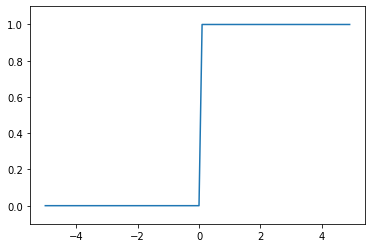

In [21]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

In [ ]:
np.arange(-5.0, 5.0, 0.2)は-5.0から5.0までの範囲を0.1刻みでNumpy配列を生成する.  
([-0.5, -4.9, …, 4.9]を生成します.)  
step_function()はNumPy配列を引数に取り, 配列の各要素に対してステップ関数を実行し, 結果を配列として返します.  
この, x, y 配列をプロットすると結果は次の図3-6のようになります.  
図3-6で表されるように, ステップ関数は0を境にして,出力が0から1(または, 1から0)へ切り替わります.  
図3-6のように階段上に値が切り替わる形からステップ「階段関数」とよばれることもおすすめす.  

### 3.2.4 シグモイド関数の実装

シグモイド関数を実装しましょう.  
式(3.6)のシグモイド関数はPythonで次のように書くことができます.  

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

ここでnp.exp(-x)は数式のexp(-x)に対応します.  
この実装は特に難しいことはありませんが, 引数のxにNumPy配列を入力しても, 結果は正しく計算されることに注意しましょう.  
実際, この**sigmoid**関数にNumPy配列を入力すると, 次のように正しく計算されます.  

In [42]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

シグモイド関数の実装がNumPy配列に対応していることは, NumPyのブロードキャストに秘密があります.  
ブロードキャストの機能により, スカラ値とNumPy配列での演算が行われると, スカラ値とNumPy配列の各要素どうしで演算が行われます.  
ここでもひとつ具体例を示しましょう.

In [43]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [44]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

上の例えでは, スカラ値(例では, 1.0)とNumPy配列の間で数値演算(+や/など)が行われています.  
結果としてスカラ値とNumPy配列の各要素の間で演算が行われ, 演算の結果がNumPy配列として出力されています.  
先のシグモイド関数の実装でも, np.exp(-x)はNumPy配列を生成するため, 1 / (1 + np.exp(-x))の結果は, NumPy配列の各要素の間で計算されることになります.  
それでは, シグモイド関数をグラフに描画します.  
描画のためのコードは, 先のステップ関数のコードとほとんど同じです.  
唯一異なる箇所は, yを出力する関数をsigmoid関数に変更する点です.  

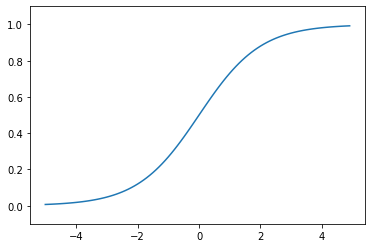

In [45]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()